In [1]:
import CalculatedFieldSubroutines as cfs
import plotly.express as px
import pandas as pd
from CalculatedFieldSubroutines import BinaryDrivingMode
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
gmIDS=cfs.list_whitelisted_gmIDs()

In [3]:
RedgmIDs=[]
for gmID in gmIDS:
    if cfs.give_route(gmID)=="Red":
        RedgmIDs.append(gmID)
        

In [4]:
print (RedgmIDs)

['622bd2e8-f0e4-11ee-ba1f-fb353e7798cd', '868de15e-f3b3-11ee-bb4e-fb353e7798cd', '8347b862-efad-11ee-b966-fb353e7798cd', '43a1a35e-f362-11ee-bb4e-fb353e7798cd', '96f7a614-f549-11ee-8afa-cb629b0d53e6', '9189a2a8-f121-11ee-ba5b-fb353e7798cd', '05c7c824-cab8-11ee-aa4d-1d66adf2f0c7', '2f95c748-f009-11ee-b966-fb353e7798cd', '8437f77a-cab7-11ee-909c-e1dc60cf66f9', '171c50bc-f106-11ee-ba42-fb353e7798cd', '88a68dd8-eef9-11ee-9385-ef789ffde1d3', '85b6e70e-ef7a-11ee-b966-fb353e7798cd', 'fe973c9c-f53c-11ee-8afa-cb629b0d53e6', '94c53148-eeed-11ee-9385-ef789ffde1d3', '211bdb36-f0da-11ee-ba1b-fb353e7798cd', '88dd6fbe-f224-11ee-bb21-fb353e7798cd', '8fa6fe80-c869-11ee-a7fc-dd032dba19e8', '2462c9d0-eecd-11ee-9385-ef789ffde1d3', '3151e9e2-eff3-11ee-b966-fb353e7798cd', 'dd72fdec-f0cf-11ee-ba0d-fb353e7798cd', 'f43b6a70-f01e-11ee-b966-fb353e7798cd', 'f0eebb6a-f0dc-11ee-ba1e-fb353e7798cd', 'e7b934a8-ef1a-11ee-9385-ef789ffde1d3', '853ef120-cad3-11ee-909c-e1dc60cf66f9', 'c25271be-f3a4-11ee-bb4e-fb353e7798cd',

In [5]:
print(len(RedgmIDs))

69


In [6]:
training_RedgmIDs_num = int(69 * .8)
test_RedgmIDs_num = len( RedgmIDs) - training_RedgmIDs_num
print( training_RedgmIDs_num )
print( test_RedgmIDs_num )

55
14


In [7]:

RedgmIDs = RedgmIDs

# Convert the list to a pandas DataFrame
RedgmIDs_DF = pd.DataFrame({'gmids': RedgmIDs})

# Randomly sample 55 gmids
Training_RedgmIDs_DF = RedgmIDs_DF.sample(n=55, random_state=42)

# Get the remaining 14 gmids
Test_RedgmIDs_DF = RedgmIDs_DF.drop(Training_RedgmIDs_DF.index)

# Print the results
print("Training Set (55 GMIDs):")
print(Training_RedgmIDs_DF)
print("\nTest Set (14 GMIDs):")
print(Test_RedgmIDs_DF)

Training Set (55 GMIDs):
                                   gmids
22  e7b934a8-ef1a-11ee-9385-ef789ffde1d3
0   622bd2e8-f0e4-11ee-ba1f-fb353e7798cd
47  d24820c8-f197-11ee-babe-fb353e7798cd
4   96f7a614-f549-11ee-8afa-cb629b0d53e6
53  817d6848-efb6-11ee-b966-fb353e7798cd
18  3151e9e2-eff3-11ee-b966-fb353e7798cd
10  88a68dd8-eef9-11ee-9385-ef789ffde1d3
33  9798fe24-f143-11ee-ba78-fb353e7798cd
44  cf831f42-f353-11ee-bb4e-fb353e7798cd
12  fe973c9c-f53c-11ee-8afa-cb629b0d53e6
31  457dc5ee-f02a-11ee-b966-fb353e7798cd
9   171c50bc-f106-11ee-ba42-fb353e7798cd
59  1b6aca0e-efdf-11ee-b966-fb353e7798cd
5   9189a2a8-f121-11ee-ba5b-fb353e7798cd
68  ecebb942-f162-11ee-ba97-fb353e7798cd
30  3344a3c0-f502-11ee-8afa-cb629b0d53e6
57  ce6465b6-f51b-11ee-8afa-cb629b0d53e6
35  b82476fe-f1f3-11ee-baff-fb353e7798cd
56  1ee938a2-f172-11ee-baa6-fb353e7798cd
46  6d2ea45a-c839-11ee-a7fc-dd032dba19e8
16  8fa6fe80-c869-11ee-a7fc-dd032dba19e8
34  f711e68e-f0e1-11ee-ba1f-fb353e7798cd
42  aa5dbcd2-ef10-11ee-9385-ef78

In [8]:
final_df = pd.DataFrame()

In [9]:
for gmID in RedgmIDs:
    gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )
    gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis')
    gmID_chassis_df = gmID_chassis_df.sort_values("time")
    gmID_best_pose_df = gmID_best_pose_df.sort_values("time")

    cfs.BinaryDrivingMode(gmID_chassis_df)
    cfs.TernaryDrivingModeTransition(gmID_chassis_df)
    cfs.LatLonTotalStdDev(gmID_best_pose_df)
    
    cfs.ChassisBestPoseMatchedTime(gmID_chassis_df, gmID_best_pose_df)
    merged_df = pd.merge(gmID_chassis_df, gmID_best_pose_df, on='ChassisBestPoseMatchedTime')
    final_df = pd.concat([final_df,merged_df])


In [10]:
for c in final_df.columns:
    print(c)

brakePercentage
groupMetadataID_x
drivingMode
speedMps
time_x
throttlePercentage
steeringPercentage
signal.turnSignal
BinaryDrivingMode
TernaryDrivingModeTransition
ChassisBestPoseMatchedTime
heightMsl
groupMetadataID_y
latitudeStdDev
longitude
solType
extendedSolutionStatus
time_y
heightStdDev
solStatus
latitude
longitudeStdDev
numSatsInSolution
LatLonTotalStdDev


In [11]:
# Specify train and test identifiers
Training_RedgmIDs_DF = ('61b12e7a-f234-11ee-bb33-fb353e7798cd',
'fcc6fcd2-f013-11ee-b966-fb353e7798cd',
'05c7c824-cab8-11ee-aa4d-1d66adf2f0c7',
'211bdb36-f0da-11ee-ba1b-fb353e7798cd',
'868de15e-f3b3-11ee-bb4e-fb353e7798cd',
'72a03d4a-efe9-11ee-b966-fb353e7798cd',
'7fb7b9c0-c881-11ee-a7fc-dd032dba19e8',
'96f7a614-f549-11ee-8afa-cb629b0d53e6',
'1bbbfbae-c839-11ee-a7fc-dd032dba19e8',
'622bd2e8-f0e4-11ee-ba1f-fb353e7798cd',
'9798fe24-f143-11ee-ba78-fb353e7798cd',
'88dd6fbe-f224-11ee-bb21-fb353e7798cd',
'c9c6856c-d33c-11ee-b437-336917683bb8',
'd12cd1c4-caec-11ee-909c-e1dc60cf66f9',
'817d6848-efb6-11ee-b966-fb353e7798cd',
'1b6aca0e-efdf-11ee-b966-fb353e7798cd',
'41b67a28-f52f-11ee-8afa-cb629b0d53e6',
'fc211bb2-efca-11ee-b966-fb353e7798cd',
'84d96f18-f214-11ee-bb13-fb353e7798cd',
'fe973c9c-f53c-11ee-8afa-cb629b0d53e6',
'3151e9e2-eff3-11ee-b966-fb353e7798cd',
'c0555ef0-f50f-11ee-8afa-cb629b0d53e6',
'f711e68e-f0e1-11ee-ba1f-fb353e7798cd',
'c338788a-d324-11ee-b437-336917683bb8',
'd21965e6-f0fa-11ee-ba37-fb353e7798cd',
'88a68dd8-eef9-11ee-9385-ef789ffde1d3',
'f41cbd44-eff8-11ee-b966-fb353e7798cd',
'43a1a35e-f362-11ee-bb4e-fb353e7798cd',
'6d2ea45a-c839-11ee-a7fc-dd032dba19e8',
'01e65360-efd4-11ee-b966-fb353e7798cd',
'7cbd932e-f244-11ee-bb3f-fb353e7798cd',
'65cfbfd6-f396-11ee-bb4e-fb353e7798cd',
'94c53148-eeed-11ee-9385-ef789ffde1d3',
'fd1ab258-efa7-11ee-b966-fb353e7798cd',
'e7b934a8-ef1a-11ee-9385-ef789ffde1d3',
'de933de8-f112-11ee-ba4d-fb353e7798cd',
'd3698592-ef9d-11ee-b966-fb353e7798cd',
'dd72fdec-f0cf-11ee-ba0d-fb353e7798cd',
'b82476fe-f1f3-11ee-baff-fb353e7798cd',
'f755cf60-f132-11ee-ba6d-fb353e7798cd',
'853ef120-cad3-11ee-909c-e1dc60cf66f9',
'f0eebb6a-f0dc-11ee-ba1e-fb353e7798cd',
'cf831f42-f353-11ee-bb4e-fb353e7798cd',
'ecebb942-f162-11ee-ba97-fb353e7798cd',
'219f7eb8-ef87-11ee-b966-fb353e7798cd',
'd24820c8-f197-11ee-babe-fb353e7798cd',
'3d2d29ec-ef95-11ee-b966-fb353e7798cd',
'457dc5ee-f02a-11ee-b966-fb353e7798cd',
'2462c9d0-eecd-11ee-9385-ef789ffde1d3',
'51ef6da6-ca9f-11ee-909c-e1dc60cf66f9',
'c25271be-f3a4-11ee-bb4e-fb353e7798cd',
'8347b862-efad-11ee-b966-fb353e7798cd',
'8dbbbf1c-f0ef-11ee-ba29-fb353e7798cd',
'9189a2a8-f121-11ee-ba5b-fb353e7798cd',
'8fa6fe80-c869-11ee-a7fc-dd032dba19e8')


Test_RedgmIDs_DF = ('35518ec4-f153-11ee-ba88-fb353e7798cd',
'2f95c748-f009-11ee-b966-fb353e7798cd',
'8437f77a-cab7-11ee-909c-e1dc60cf66f9',
'2a61b8a8-f528-11ee-8afa-cb629b0d53e6',
'5a4bccf4-effe-11ee-b966-fb353e7798cd',
'f43b6a70-f01e-11ee-b966-fb353e7798cd',
'85b6e70e-ef7a-11ee-b966-fb353e7798cd',
'171c50bc-f106-11ee-ba42-fb353e7798cd',
'1ee938a2-f172-11ee-baa6-fb353e7798cd',
'286e019a-f204-11ee-bb07-fb353e7798cd',
'aa5dbcd2-ef10-11ee-9385-ef789ffde1d3',
'ce6465b6-f51b-11ee-8afa-cb629b0d53e6',
'be857244-efc0-11ee-b966-fb353e7798cd',
'3344a3c0-f502-11ee-8afa-cb629b0d53e6')

# Filter the dataframe into training and testing sets based on the identifiers
train_df = final_df[final_df['groupMetadataID_x'].isin(Training_RedgmIDs_DF)]
test_df = final_df[final_df['groupMetadataID_x'].isin(Test_RedgmIDs_DF)]

# Separate features (X) and target (y) for both training and testing sets
X_train = train_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_train = train_df['BinaryDrivingMode']  # Ensure this column name matches your target variable

X_test = test_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_test = test_df['BinaryDrivingMode']

# Standardize the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8260
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61    183095
           1       0.88      0.90      0.89    607086

    accuracy                           0.83    790181
   macro avg       0.76      0.74      0.75    790181
weighted avg       0.82      0.83      0.82    790181



In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[105445  77650]
 [ 59853 547233]]


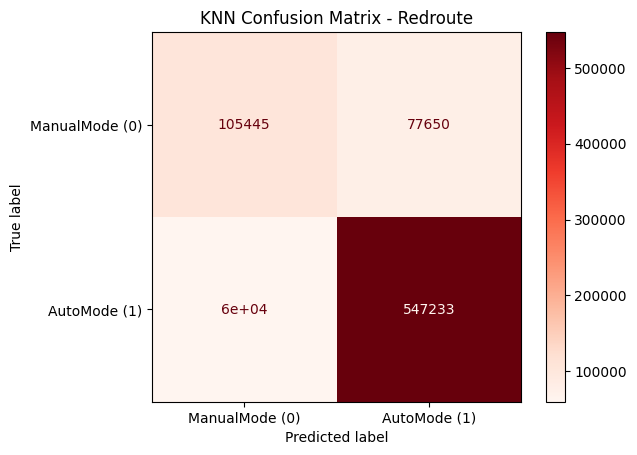

In [13]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['ManualMode (0)', 'AutoMode (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with a title
disp.plot(cmap=plt.cm.Reds)
plt.title("KNN Confusion Matrix - Redroute")
plt.show()

In [14]:
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}')

Balanced accuracy: 0.7387
